In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, ConfusionMatrixDisplay, RocCurveDisplay, classification_report

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

In [3]:
dataset = pd.read_csv("bl.txt")
dataset.head()

,balance,left_weight,left_distance,right_weight,right_distance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


In [4]:
#Shape of the dataset
print("The shape of the dataset is :")
display(dataset.shape)
#The columns of the dataset
print("The columns of the dataset :")
display(dataset.columns)
#The type of the columns of the dataset 
print("The Type of columns of the dataset :")
display(dataset.dtypes)
#Some statistical information about the dataset
print(" Some statistical information about the dataset :")
display(dataset.describe(include="all"))
#The pourcentage of missing value in the columns of the dataset
print(" The pourcentage of missing value in the columns of the dataset:")
display(100*dataset.isnull().sum()/dataset.shape[0])

The shape of the dataset is :


(625, 5)

The columns of the dataset :


Index(['balance', 'left_weight', 'left_distance', 'right_weight',
       'right_distance'],
      dtype='object')

The Type of columns of the dataset :


balance           object
left_weight        int64
left_distance      int64
right_weight       int64
right_distance     int64
dtype: object

 Some statistical information about the dataset :


,balance,left_weight,left_distance,right_weight,right_distance
count,625,625.000000,625.000000,625.000000,625.000000
unique,3,NaN,NaN,NaN,NaN
top,R,NaN,NaN,NaN,NaN
freq,288,NaN,NaN,NaN,NaN
mean,NaN,3.000000,3.000000,3.000000,3.000000
std,NaN,1.415346,1.415346,1.415346,1.415346
min,NaN,1.000000,1.000000,1.000000,1.000000
25%,NaN,2.000000,2.000000,2.000000,2.000000
50%,NaN,3.000000,3.000000,3.000000,3.000000
75%,NaN,4.000000,4.000000,4.000000,4.000000


 The pourcentage of missing value in the columns of the dataset:


balance           0.0
left_weight       0.0
left_distance     0.0
right_weight      0.0
right_distance    0.0
dtype: float64

In [9]:
for j in dataset['balance']:
    if j!='B'and j!='R':
        print(j)

L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L
L


#### Since we have only numerical columns,no missing value and no useless columns to drop,  we use only label encoding for our categorical target variable . 
#### With a decision tree, there's no need to normalize the numerical variables !

In [10]:
#Separating the target variable from the other variables
X=dataset.loc[:,dataset.columns!='balance']
Y=dataset.loc[:,dataset.columns=='balance']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
encoder=LabelEncoder()
Y_train=encoder.fit_transform(Y_train)
Y_test=encoder.transform(Y_test)
classifier_gini = DecisionTreeClassifier(criterion="gini")
classifier_gini.fit(X_train, Y_train)

C:\Users\chekk\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chekk\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


DecisionTreeClassifier()

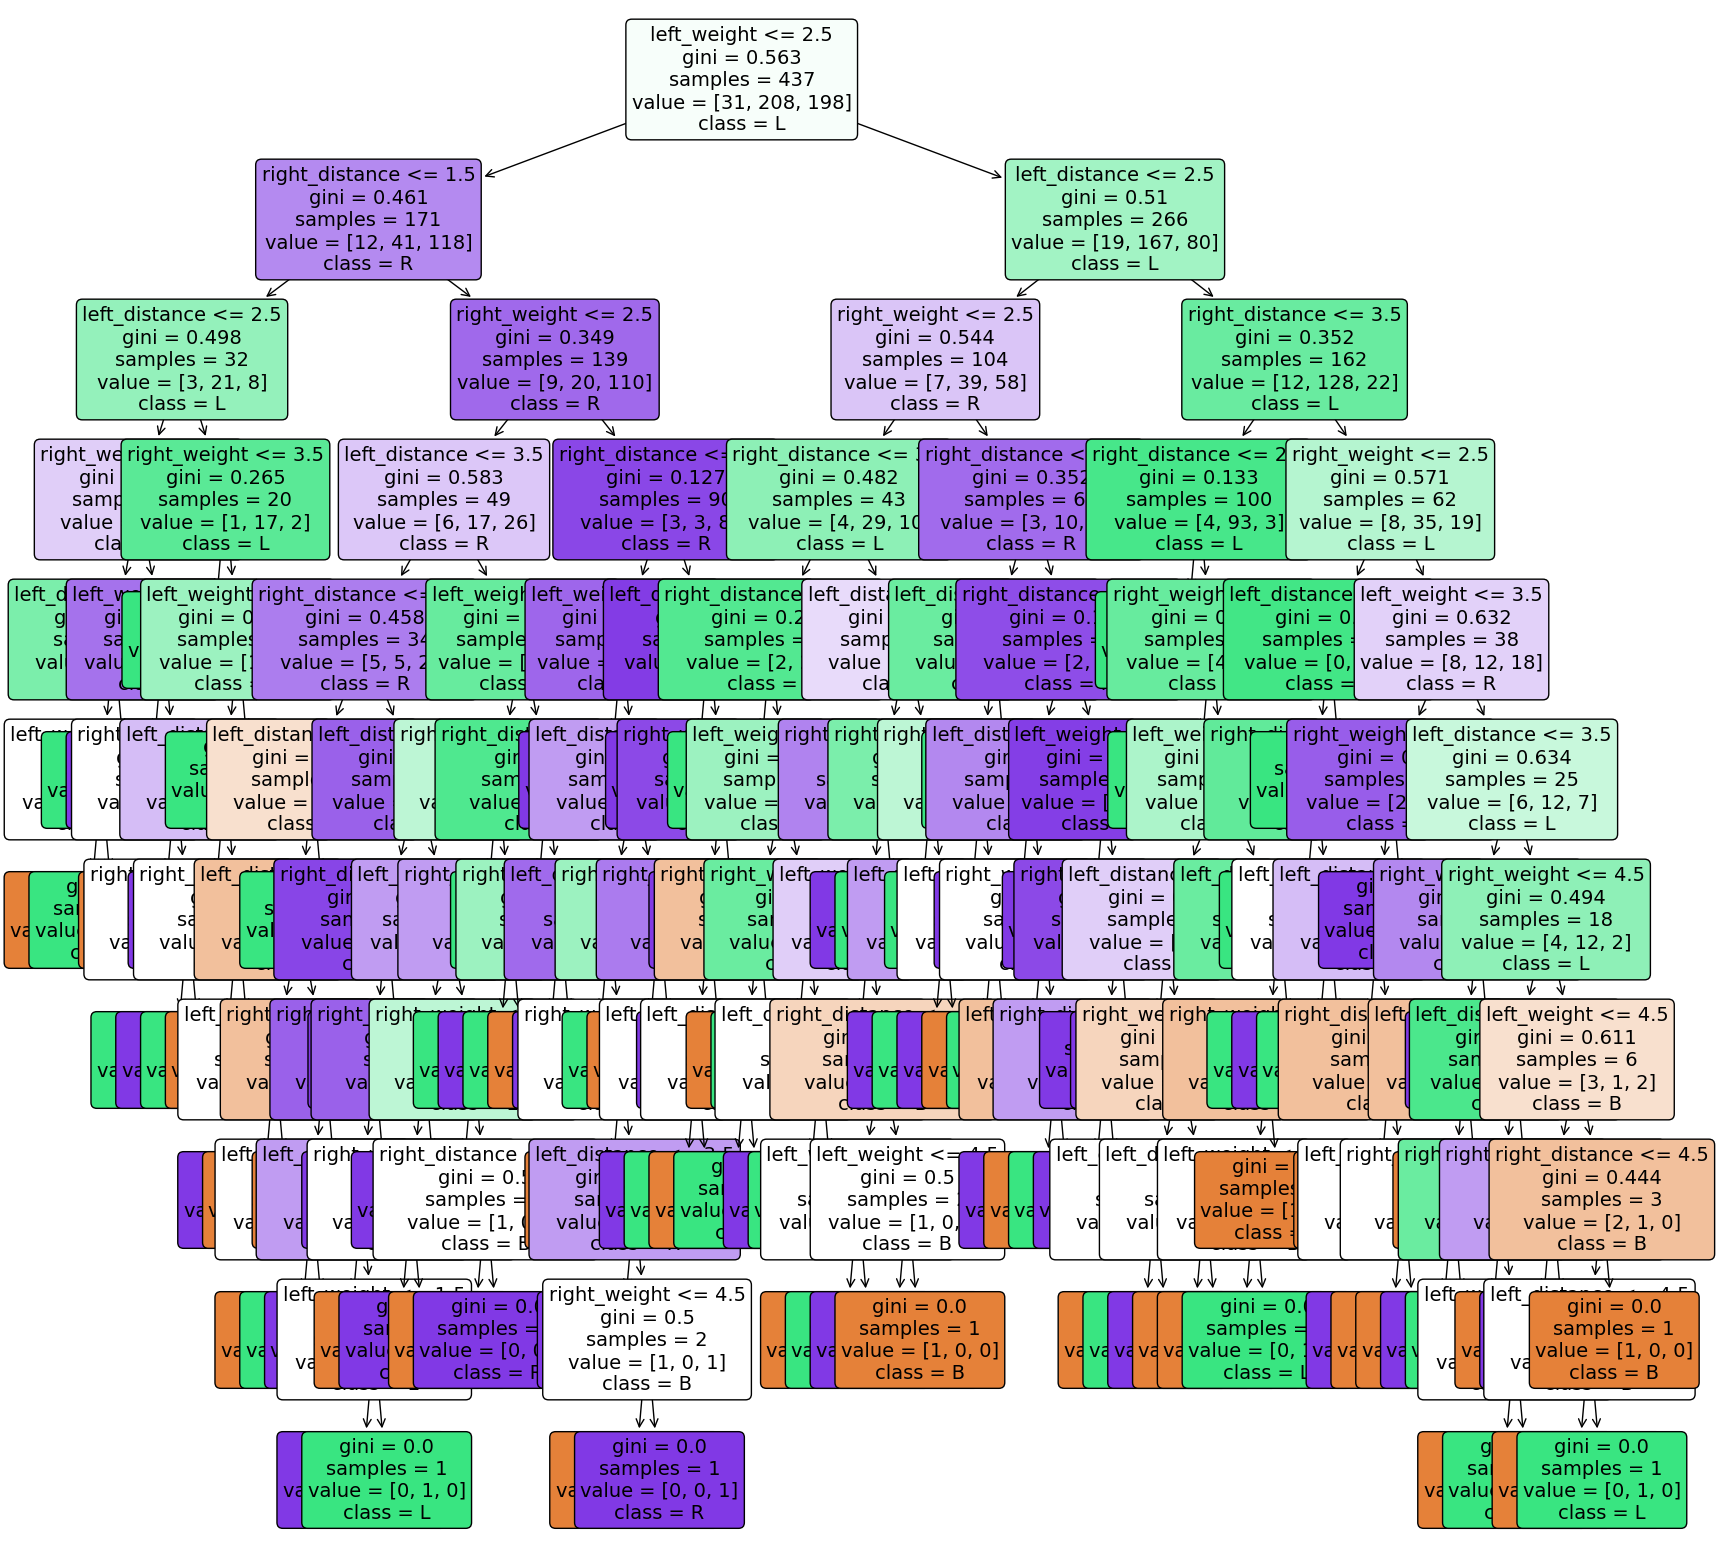

In [12]:
from sklearn.tree import plot_tree
class_names = encoder.inverse_transform([0, 1, 2])
plt.figure(figsize=(20,20))
display_tree=plot_tree(decision_tree=classifier_gini,feature_names=['left_weight', 'left_distance', 'right_weight',
       'right_distance'],class_names=class_names,filled=True,rounded=True,fontsize=14)

In [13]:
classifier_entropy = DecisionTreeClassifier(criterion="entropy")
classifier_entropy.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy')

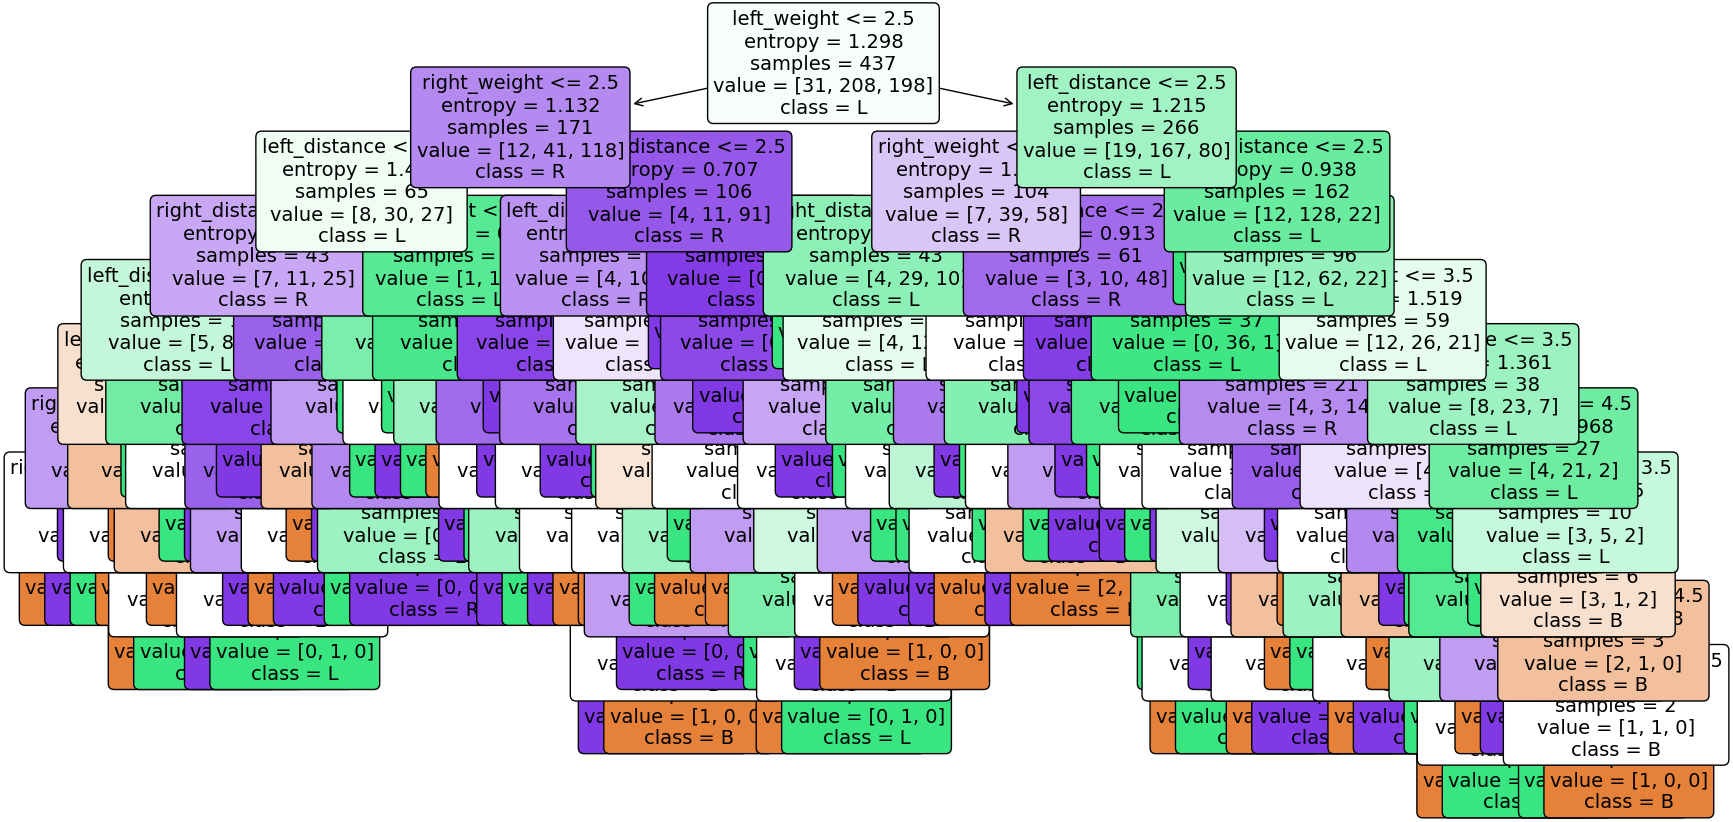

In [14]:
plt.figure(figsize=(20,10))
a = plot_tree(classifier_entropy, 
              feature_names=X.columns, 
              class_names=class_names, 
              filled=True, 
              rounded=True, 
              fontsize=14)

In [21]:
X_new =[[4, 4, 3, 3]]
predicted_class1 = classifier_gini.predict(X_new)
if predicted_class1 == "left":
    print("The observation is classified as 'left' for tree classified with gini impurity.")
else:
    print("The observation is classified as something other than 'left for' for tree classified with gini impurity.")
    
predicted_class2 = classifier_entropy.predict(X_new)
if predicted_class2 == "left":
    print("The observation is classified as 'left' for tree classified with entropy .")
else:
    print("The observation is classified as something other than 'left for' for tree classified with entropy.")

The observation is classified as something other than 'left for' for tree classified with gini impurity.
The observation is classified as something other than 'left for' for tree classified with entropy.


C:\Users\chekk\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\chekk\AppData\Local\Temp\ipykernel_19360\1751728975.py:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if predicted_class1 == "left":
C:\Users\chekk\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\chekk\AppData\Local\Temp\ipykernel_19360\1751728975.py:9: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if predicted_class2 == "left":


In [29]:
#gini classifier to make predictions on the test set
Y_test_pred_gini=classifier_gini.predict(X_test)
Y_test_pred

array([0, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 0, 1, 2, 1, 1, 2, 2, 2, 1, 0, 2,
       2, 1, 1, 1, 0, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 0, 1, 2, 2, 1,
       2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1,
       1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 0, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 0, 2, 1, 1, 1, 2, 2, 1,
       2, 0, 2, 2, 1, 2, 1, 1, 1, 0, 1, 2, 1, 2, 2, 2, 0, 2, 1, 2, 1, 1,
       1, 2, 1, 2, 1, 2, 1, 1, 1, 0, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 0,
       1, 2, 1, 1, 1, 1, 1, 2, 2, 0, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1,
       1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1])

In [30]:
#Entropy classifier to make predictions on the test set
Y_test_pred_entropy=classifier_gini.predict(X_test)
Y_test_pred

array([0, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 0, 1, 2, 1, 1, 2, 2, 2, 1, 0, 2,
       2, 1, 1, 1, 0, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 0, 1, 2, 2, 1,
       2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1,
       1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 0, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 0, 2, 1, 1, 1, 2, 2, 1,
       2, 0, 2, 2, 1, 2, 1, 1, 1, 0, 1, 2, 1, 2, 2, 2, 0, 2, 1, 2, 1, 1,
       1, 2, 1, 2, 1, 2, 1, 1, 1, 0, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 0,
       1, 2, 1, 1, 1, 1, 1, 2, 2, 0, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1,
       1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1])

In [36]:
#method 1 to get the proportions of predictions that are identical in gini and entropy method
count = 0

for i in range(0, len(Y_test_pred_gini)):
  
  if Y_test_pred_gini[i] != Y_test_pred_entropy[i]:
    count+= 1

print("on the test set, there are {} examples that have different predictions from Gini and Entropy".format(count))
print("Which corresponds to a percentage of {}% ".format(np.round(count/len(Y_test_pred_gini)*100, 3)))

on the test set, there are 0 examples that have different predictions from Gini and Entropy
Which corresponds to a percentage of 0.0% 


In [32]:
#method 2 to get the proportions of predictions that are identical in gini and entropy method
cpt = 0
for i, j in zip(Y_test_pred_gini, Y_test_pred_entropy):
    if i == j:
        cpt += 1

proportion_identical = (cpt / len(Y_test_pred_gini)) * 100
print('The proportion of identical predictions is {}%'.format(proportion_identical))             
        

The proportion of identical predictions is 100.0%


In [38]:
#Accuracy of gini classifier
print("Accuracy of gini classifier {}".format(classifier_gini.score(X_test, Y_test)))

Accuracy of gini classifier 0.7819148936170213


In [39]:
#Accuracy of entropy classifier
print("Accuracy of gini classifier {}".format(classifier_entropy.score(X_test, Y_test)))

Accuracy of gini classifier 0.776595744680851


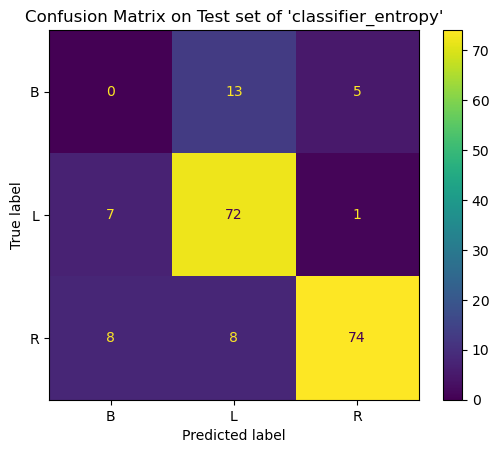

In [43]:
#Confusion matrix on test set 
_ , ax = plt.subplots() # Get subplot from matplotlib
display_labels= ["R", "B", "L"] 
ax.set(title="Confusion Matrix on Test set of 'classifier_entropy'") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(classifier_entropy, X_test, Y_test,display_labels=class_names, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

#### We see that there is no True Positive for the class 'B' so it is classified in a wrong way by the model !

In [50]:
print('X_test_entropy {} :'.format(classification_report(y_true = Y_test, y_pred=classifier_entropy.predict(X_test))))
print('|----------------------------------------------------------------------------------|')
print('X_train_entropy {}:'.format(classification_report(y_true = Y_train, y_pred = classifier_entropy.predict(X_train))))
print('|----------------------------------------------------------------------------------|')
print('X_test_gini {}:'.format(classification_report(y_true = Y_test, y_pred = classifier_gini.predict(X_test))))
print('|----------------------------------------------------------------------------------|')
print('X_train_entropy {}:'.format(classification_report(y_true = Y_train, y_pred = classifier_gini.predict(X_train))))



X_test_entropy               precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.77      0.90      0.83        80
           2       0.93      0.82      0.87        90

    accuracy                           0.78       188
   macro avg       0.57      0.57      0.57       188
weighted avg       0.77      0.78      0.77       188
 :
|----------------------------------------------------------------------------------|
X_train_entropy               precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00       208
           2       1.00      1.00      1.00       198

    accuracy                           1.00       437
   macro avg       1.00      1.00      1.00       437
weighted avg       1.00      1.00      1.00       437
:
|----------------------------------------------------------------------------------|
X_test_gini               precisio

#### Both models are overfitting !

In [51]:
#Fighting overfitting 
rtc = DecisionTreeClassifier()
params = {'max_depth' : np.arange(1,10),
         'min_samples_split' : [2, 5, 10, 20]}

grid =  GridSearchCV(estimator=rtc, param_grid= params, cv = 10)
grid.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': [2, 5, 10, 20]})

In [52]:
print('Classification report on train set:')
print(classification_report(Y_train, grid.best_estimator_.predict(X_train)))

Classification report on train set:
              precision    recall  f1-score   support

           0       0.72      0.90      0.80        31
           1       1.00      0.97      0.98       208
           2       0.98      0.97      0.98       198

    accuracy                           0.97       437
   macro avg       0.90      0.95      0.92       437
weighted avg       0.97      0.97      0.97       437



In [53]:
print('Classification report on test set:')
print(classification_report(Y_test, grid.best_estimator_.predict(X_test)))


Classification report on test set:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.75      0.91      0.82        80
           2       0.92      0.80      0.86        90

    accuracy                           0.77       188
   macro avg       0.56      0.57      0.56       188
weighted avg       0.76      0.77      0.76       188



#### The reason you see a low precision and recall for class 0 compared to classes 1 and 2 could be due to several factors:

#### Class Imbalance: Class 0 might be a minority class with fewer examples, making it harder for the model to learn and predict accurately.

#### Data Quality: The quality of data for class 0 might be lower, leading to more misclassifications.